# Problem statement


The data is related with direct marketing campaigns of a Portuguese banking institution.
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,
in order to access if the product (bank term deposit) would be (or not) subscribed.
We will explore the dataset in order to find trend and patterns in the dataset and Build different Machine Learning
models that will help to predict future outcomes.

### Features in the Dataset

Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign:

1 - contact: contact communication type (categorical: "unknown","telephone","cellular")

2 - day: last contact day of the month (numeric)

3 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

4 - duration: last contact duration, in seconds (numeric)

other attributes:

1 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

2 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

3 - previous: number of contacts performed before this campaign and for this client (numeric)

4 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

### Importing necessary Libraries

In [1]:
# I imported necessary modules to work with dataset eg. Pandas to read dataset and seaborn for plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')  

### Loading Dataset

In [2]:
# Loading dataset into pandas dataframe and Dislaying top 5 rows
df=pd.read_csv('Campaign.csv') 
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,35,housemaid,married,primary,no,77,no,no,cellular,8,aug,191,1,-1,0,unknown,no
1,40,management,married,tertiary,no,1468,no,no,cellular,8,aug,63,2,-1,0,unknown,no
2,40,technician,married,secondary,no,8844,no,no,cellular,8,aug,204,1,-1,0,unknown,no
3,33,technician,single,tertiary,no,6127,no,no,cellular,8,aug,127,3,-1,0,unknown,no
4,32,management,married,tertiary,no,0,no,no,cellular,8,aug,83,1,-1,0,unknown,no


<h1 > Overview of Dataset </h1>

In [3]:
# This dataset contains 9500 records and 17 columns.
df.shape

(9500, 17)

In [4]:
# This function provides statisitcal description like mean,max,min etc of every numeric column
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000
mean,41.603895,1669.454632,19.659053,239.332947,3.124211,26.151158,0.496632
std,9.205966,3567.369736,6.930913,260.027527,3.302955,67.246401,3.329011
min,21.000000,-2604.000000,2.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,75.000000,17.000000,92.000000,1.000000,-1.000000,0.000000
50%,40.000000,505.000000,20.000000,157.000000,2.000000,-1.000000,0.000000
75%,49.000000,1724.250000,25.000000,283.000000,4.000000,-1.000000,0.000000
max,83.000000,98417.000000,31.000000,4918.000000,38.000000,273.000000,275.000000


In [5]:
#This function shows datatype of each column size of total dataset and number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9500 non-null   int64 
 1   job        9500 non-null   object
 2   marital    9500 non-null   object
 3   education  9500 non-null   object
 4   default    9500 non-null   object
 5   balance    9500 non-null   int64 
 6   housing    9500 non-null   object
 7   loan       9500 non-null   object
 8   contact    9500 non-null   object
 9   day        9500 non-null   int64 
 10  month      9500 non-null   object
 11  duration   9500 non-null   int64 
 12  campaign   9500 non-null   int64 
 13  pdays      9500 non-null   int64 
 14  previous   9500 non-null   int64 
 15  poutcome   9500 non-null   object
 16  y          9500 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [6]:
# Columns present in dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
# Dropping duplicates from dataset
df.drop_duplicates(inplace=True)

In [8]:
# checking nulls in datset
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Exploratory Data Analysis 

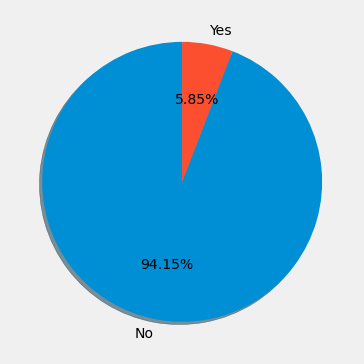

In [9]:
# Percentage of people of subscribed and who don't
plt.figure(figsize=(6,6))
y = df['y'].value_counts()
mylabels = ["No", "Yes"]
plt.pie(y, labels = mylabels, shadow = True,startangle=90,autopct='%1.2f%%')
plt.show() 

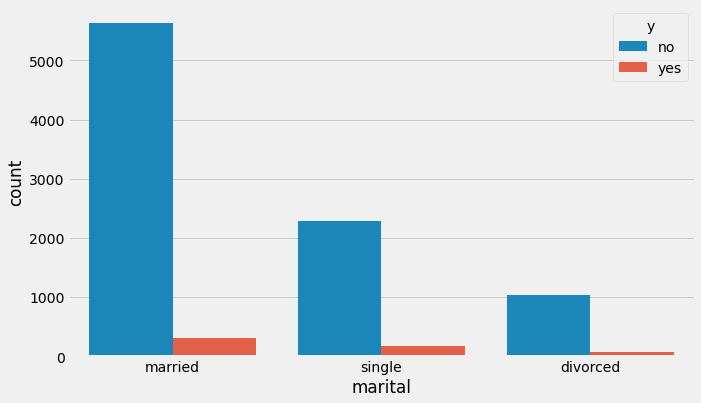

In [10]:
# Number of people who has subsribed and who don't based on marital status
plt.figure(figsize=(10,6))
sns.countplot(x='marital',hue='y',data=df);

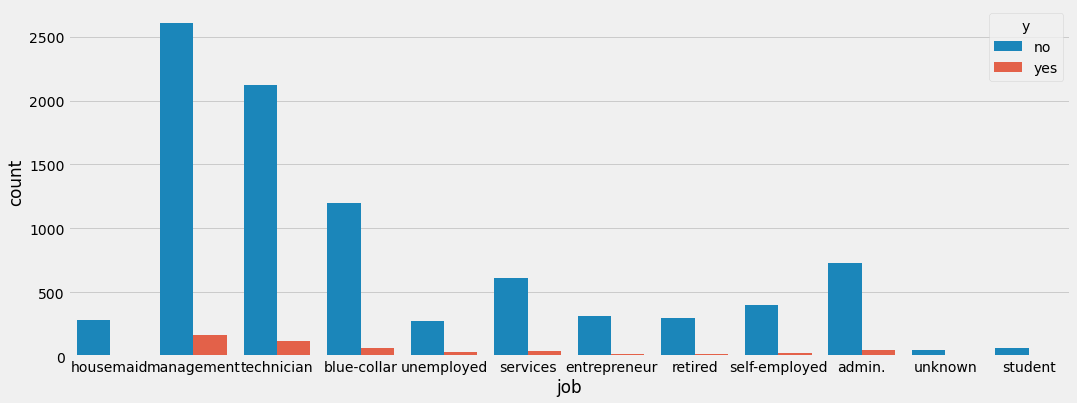

In [11]:
# Number of people who has subsribed and who don't based on Job
plt.figure(figsize=(16,6))
sns.countplot(x='job',hue='y',data=df);

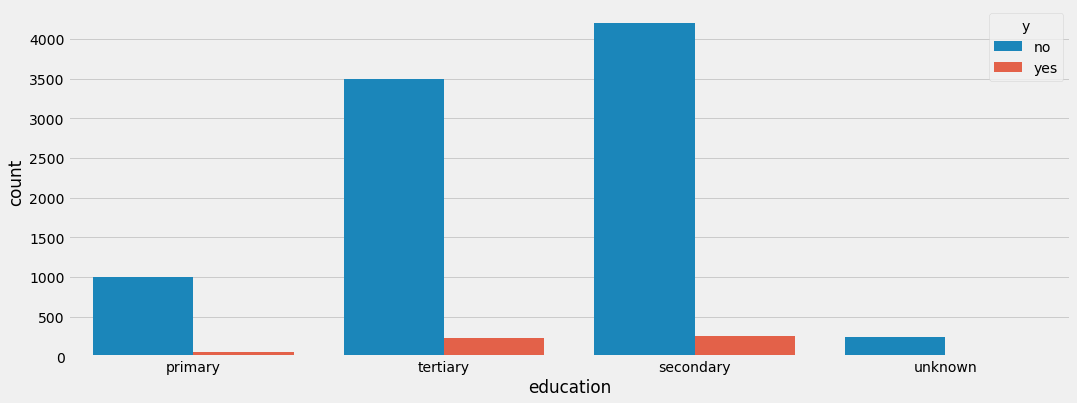

In [12]:
#Number of people who has subsribed and who don't based on Education
plt.figure(figsize=(16,6))
sns.countplot(x='education',hue='y',data=df);

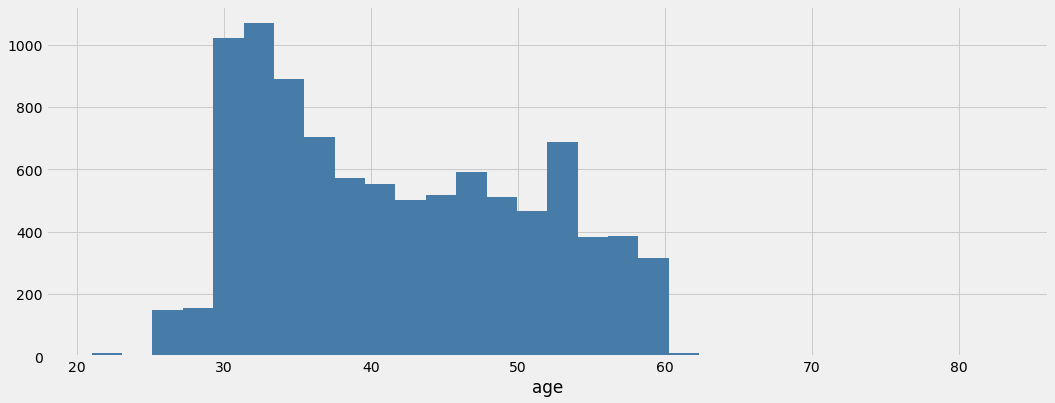

In [13]:
# Age distribution 
plt.figure(figsize=(16,6))
df['age'].hist(bins=30,color='#477CA8')
plt.xlabel('age')
plt.show()

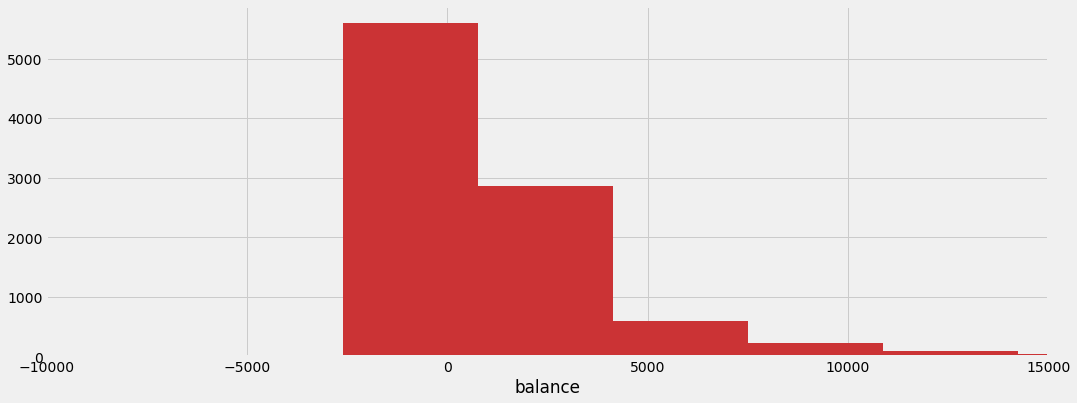

In [14]:
# Balance distribution of customers
plt.figure(figsize=(16,6))
df['balance'].hist(bins=30,color='#CB3335')
plt.xlabel('balance')
plt.xlim(-10000,15000)
plt.show()

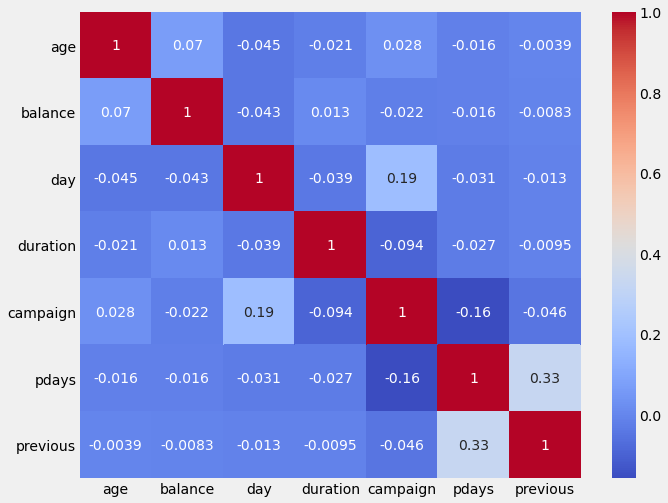

In [15]:
# Analyzing the realtionship betweeen differnt numerical columns using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm');

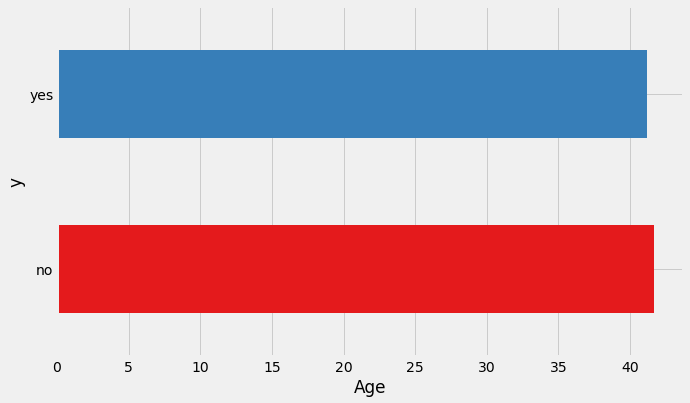

In [16]:
# Average Age of customer who Subscribed and who don't
plt.figure(figsize=(10,6))
plt.xlabel('Age')
df.groupby('y').mean()['age'].plot(kind='barh',color=sns.color_palette('Set1'));

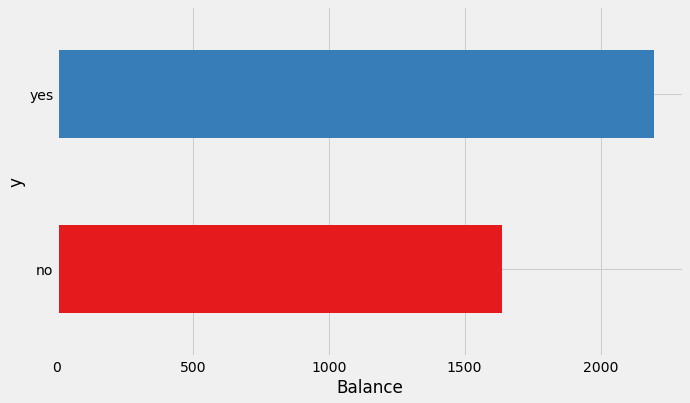

In [17]:
# Average Balance amount of customer who Subscribed and who don't
plt.figure(figsize=(10,6))
plt.xlabel('Balance')
df.groupby('y').mean()['balance'].plot(kind='barh',color=sns.color_palette('Set1'));
plt.show()

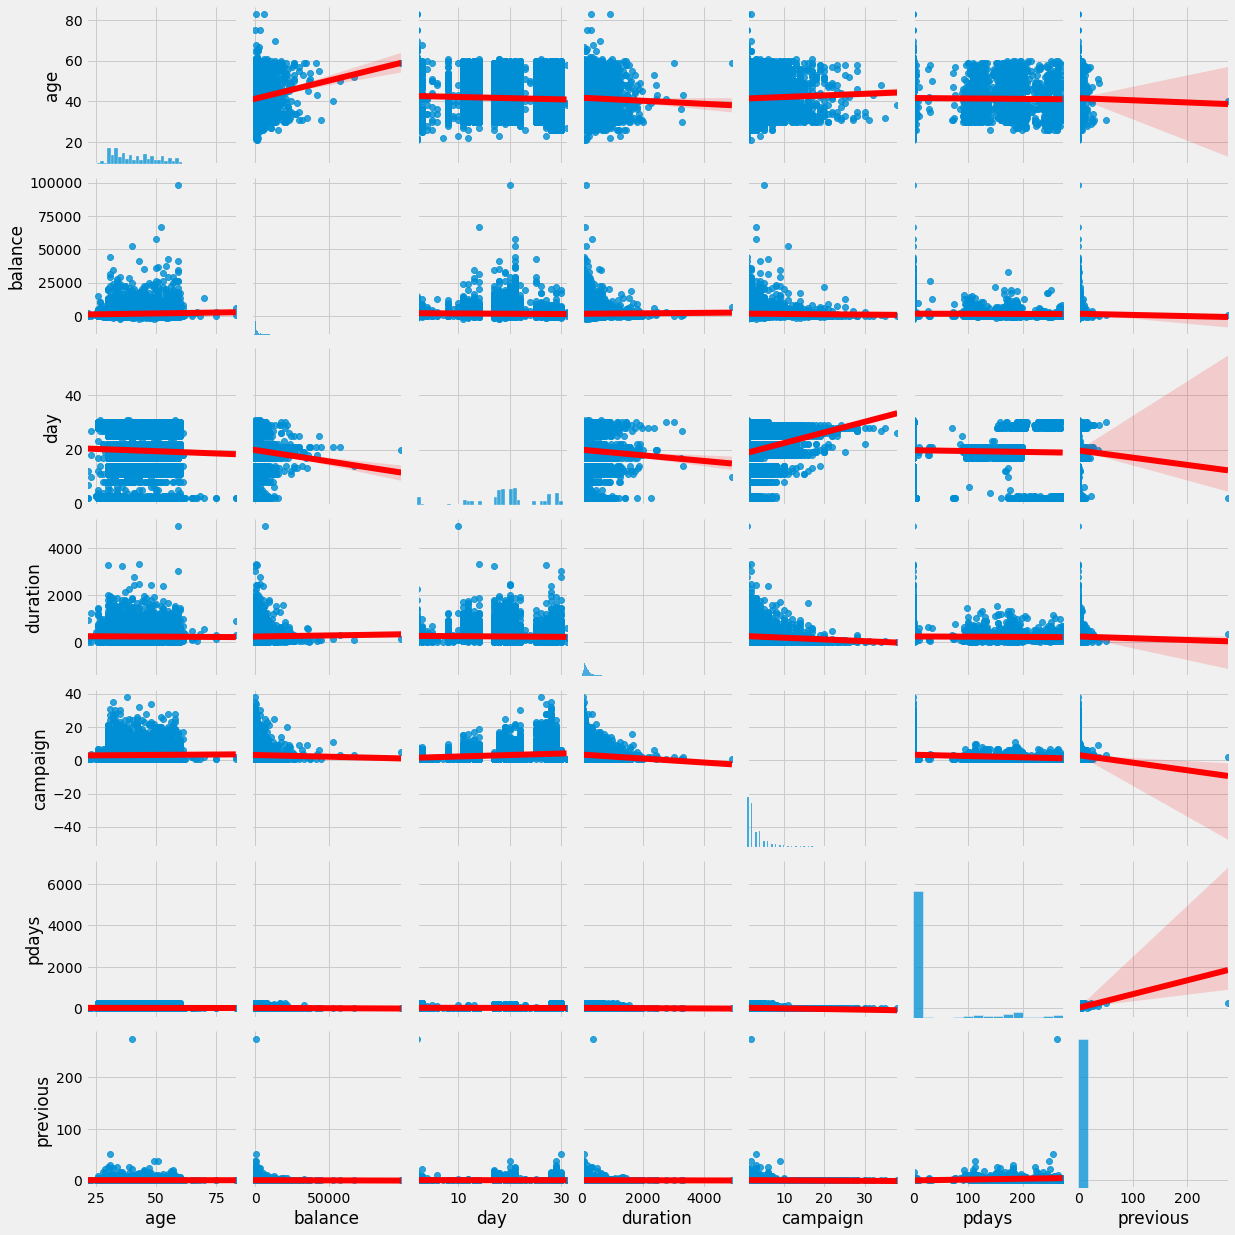

In [18]:
# pairplot wise realtionship and distribution
sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'red'}});

# Now we have done with Exploratory Data Analysis we will now move to model building and validation

In [19]:
# Encoded categorical features to numeric. For example for y. Yes will be ecndoed to 1 and no will be encoded to 0
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
df['job']= label.fit_transform(df['job'])
df['marital']= label.fit_transform(df['marital'])
df['education']= label.fit_transform(df['education'])
df['default']= label.fit_transform(df['default'])
df['housing']= label.fit_transform(df['housing'])
df['loan']= label.fit_transform(df['loan'])
df['contact']= label.fit_transform(df['contact'])
df['poutcome']= label.fit_transform(df['poutcome'])
df['month']= label.fit_transform(df['month'])
df['y']= label.fit_transform(df['y'])

In [20]:
# Subsetting x and y for balancing the data
X=df.drop(["y"],axis=1)
y=df["y"]

In [21]:
"""
I imported smote. Then initiated object of it and resampled X and Y. Where X is independent features while 
Y is depenedent feature.Again added y as column to X and assgined combination of X and Y to df.
""" 
from imblearn.over_sampling import SMOTE
smt=SMOTE()
X,y=smt.fit_resample(X,y)
X['y']=y
df=X

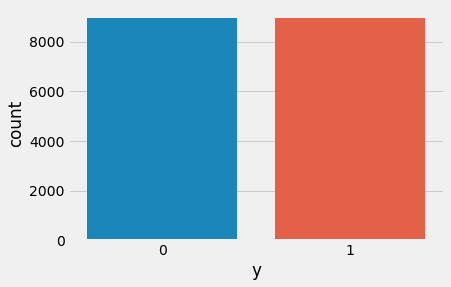

In [22]:
# count of samples for 0 and 1 class after sampling data
sns.countplot(data=df,x='y');

In [23]:
#I imported Extra Tress Classfier in order to compute features importance and select only most relevant features for model building
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
X=df.drop(['y'],axis=1)
y=df['y']

In [24]:
# Training the model
model.fit(X,y)

ExtraTreesClassifier()

In [25]:
# computing feature importances
feat_importance=pd.Series(model.feature_importances_,index=X.columns)

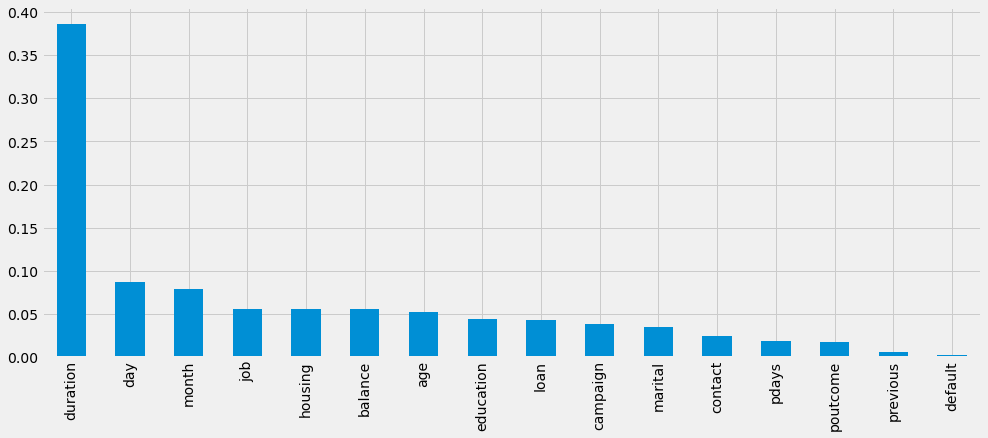

In [26]:
# plotting feature importances
plt.figure(figsize=(15,6))
feat_importance.sort_values(ascending=False).plot(kind='bar');

In [27]:
# Selecting Top 10 Features with respect to feature importances
df=df[['duration','day','month','balance','job',
       'housing','age','loan','education','campaign','y']]

In [28]:
# Splitting the dataset into training and test set. The test size is 30% and training size is 70%
from sklearn.model_selection import train_test_split
X = df.drop('y',axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [29]:
# scaling the features 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 1-Decision Tree

In [30]:
# using K-fold to measure accuracy of Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = DecisionTreeClassifier(), X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 93.36 %


### 2- KNN

In [31]:
# using K-fold to measure accuracy of KNN
from sklearn.neighbors import KNeighborsClassifier
accuracies = cross_val_score(estimator = KNeighborsClassifier(), X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 93.21 %


### 3- Logistic Regression

In [32]:
# using K-fold to measure accuracy of logistic Regression
from sklearn.linear_model import LogisticRegression
accuracies = cross_val_score(estimator = LogisticRegression(), X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 87.91 %


### 4- Support Vector Machines

In [33]:
# using K-fold to measure accuracy of SVM
from sklearn import svm
accuracies = cross_val_score(estimator = svm.SVC(), X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 92.52 %


### Naive Bayes Classifier

In [34]:
# using K-fold to measure accuracy of Naive Bayes
from sklearn.naive_bayes import GaussianNB
accuracies = cross_val_score(estimator = GaussianNB(), X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))


Accuracy: 81.53 %


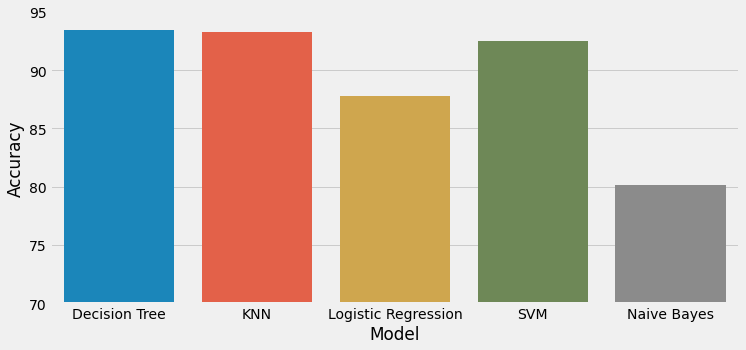

In [35]:
# Visualizaing Model Accuracies
Models=['Decision Tree','KNN','Logistic Regression','SVM','Naive Bayes']
Mean_accuracies=[93.40,93.23,87.76,92.51,80.12]
plt.figure(figsize=(11,5))
sns.barplot(x=Models,y=Mean_accuracies)
plt.ylim(70,95)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [36]:
#Using Grid Search CV to get best parameters for decsion Tree
from sklearn.model_selection import GridSearchCV
classfier = GridSearchCV(DecisionTreeClassifier(), {                                          
    'max_depth': [2, 3, 5, 10,20,30],
    'min_samples_leaf': [5, 10, 20, 50,100],
    'criterion': ["gini", "entropy"]
    
}, cv=5, return_train_score=False)
classfier.fit(X_train,y_train)
print("Best Parameters:", classfier.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 5}


In [37]:
# Since decsion Tree is performing best using it for final model building with best parameters
classifer=DecisionTreeClassifier(criterion="gini",max_depth=10,min_samples_leaf=5)
classifer.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [38]:
# Predicting results using  model
y_pred=classifer.predict(X_test)

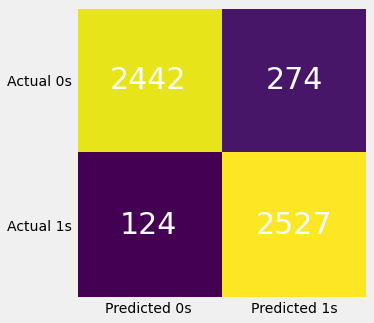

In [39]:
# Importing the confusion matrix module and plotting confusion matrix.
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
ax.imshow(Confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, Confusion_matrix[i, j], ha='center', va='center',color='white', fontsize=30,)
plt.show()

In [40]:
# printing Classification report of model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2716
           1       0.90      0.95      0.93      2651

    accuracy                           0.93      5367
   macro avg       0.93      0.93      0.93      5367
weighted avg       0.93      0.93      0.93      5367



### End